In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os
import glob
import imutils

import lightgbm as lgb

from skimage import util, exposure
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
import PIL
import io
from base64 import b64decode, b64encode
import html
import time
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js


In [ ]:
import os
import shutil

def move_files(source_folder, annotations_file, output_folder):
    # Open the annotations file and read all lines
    with open(annotations_file, 'r') as f:
        annotations = f.readlines()

    # Loop through each annotation line
    for annotation in annotations:
        # Split the line to get the file name and class label
        parts = annotation.strip().split()
        file_name = parts[0]
        class_label = parts[-1]

        # Check if the class label ends with '2'
        if class_label.endswith('2'):
            # Construct the source and destination file paths
            source_path = os.path.join(source_folder, file_name.replace('.jpg', '.jpg'))
            dest_path = os.path.join(output_folder, file_name)

            # Move the file
            shutil.move(source_path, dest_path)
            print(f"Moved {file_name} to {output_folder}")

# Replace the paths with your actual paths
source_folder = r'C:\Users\15103\Downloads\Skin-Burn.v1i.yolokeras\train'
annotations_file = r'C:\Users\15103\Desktop\_annotations.txt'
output_folder = r'C:\Users\15103\Desktop\Machine Learning\GDSC\burns\train'

move_files(source_folder, annotations_file, output_folder)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\15103\\Desktop\\_annotations.txt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

In [ ]:
image = cv2.imread('/content/2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,threshold = cv2.threshold(image,127,255,cv2.THRESH_BINARY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 30, 150, 3)
dilated = cv2.dilate(canny, (1, 1), iterations=1)

plt.imshow(dilated, cmap="gray")

(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

print("coins in the image : ", len(cnt))
plt.imshow(rgb)

In [ ]:
coins2 = cv2.imread('/content/1.jpg')
gray_coins2 = cv2.cvtColor(coins2, cv2.COLOR_BGR2GRAY)
ret,thresh_coins2 = cv2.threshold(gray_coins2,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel_coins2 = np.ones((3,3), dtype=np.uint8)
opening_coins2 = cv2.morphologyEx(thresh_coins2,cv2.MORPH_OPEN,kernel_coins2, iterations = 2)

dist_transform = cv2.distanceTransform(opening_coins2,cv2.DIST_L2,5)

ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg, cmap="gray")
int_fg = sure_fg.astype(np.uint8)

contours, hierarchy = cv2.findContours(int_fg.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(coins2, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, contours, -1, (0, 255, 0), 2)

print("coins in the image : ", len(contours))

In [ ]:
shape2_image = cv2.imread('/content/shapes.jpg')
shape2_gray = cv2.cvtColor(shape2_image, cv2.COLOR_BGR2GRAY)
shape2_thresh = cv2.adaptiveThreshold(shape2_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,51,7)

shape2_cnts = cv2.findContours(shape2_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
shape2_cnt = imutils.grab_contours(shape2_cnts)
for c in shape2_cnt:
    shape = ""
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)

    if len(approx) == 3:
        shape = "triangle"

    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)

        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

    # Pentagon
    elif len(approx) == 5:
        shape = "pentagon"

    # Otherwise assume as circle or oval
    else:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "circle" if ar >= 0.95 and ar <= 1.05 else "oval"
    x,y,w,h = cv2.boundingRect(c)
    cv2.putText(shape2_image, shape, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)


In [ ]:
horse_img = cv2.imread("/content/horse1.jpg")
horse_gray = cv2.cvtColor(horse_img, cv2.COLOR_BGR2GRAY)

horse_blurred = cv2.GaussianBlur(horse_gray, (5,5), 0)
horse_thresh = cv2.threshold(horse_blurred,127,1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

horse_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
horse_dilated = cv2.dilate(horse_thresh,horse_kernel, iterations = 1)

horse_cnt = cv2.findContours(horse_dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
horse_cnt = imutils.grab_contours(horse_cnt)

for c in horse_cnt:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(horse_img, (x,y), (x+w,y+h), (0,255,0), 2)

horse_rgb = cv2.cvtColor(horse_img, cv2.COLOR_BGR2RGB)
plt.imshow(horse_rgb)


In [ ]:
import os
Categories = ['Horse', 'Zebra']
data_dir = "/content/Texture"

data = []


for category in Categories:
  path = os.path.join(data_dir, category)
  label = Categories.index(category)

  for img in os.listdir(path):

    img_path = os.path.join(path,img)
    pet_img = cv2.imread(img_path,0)
    pet_img = cv2.resize(pet_img, (150,150))
    img = np.array(pet_img).flatten()

    data.append([img,label])


# print(len(data))

feature = []
label = []

for features, labels in data:
  feature.append(features)
  label.append(labels)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size = 0.2)

test_img = x_test[0].reshape(150,150)
plt.imshow(test_img,cmap="gray")

from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

prediction  = svc.predict(x_test)
accuracy = svc.score(x_test,y_test)

print("Prediction is ",Categories[prediction[0]])

In [ ]:
size = 128

train_images = []
train_labels = []

for directory_path in glob.glob("/content/glcm/train/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (size, size))
        train_images.append(img)
        train_labels.append(label)


train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = []
test_labels = []

for directory_path in glob.glob("/content/glcm/validation/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (size, size))
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):

        df = pd.DataFrame()
        img = dataset[image, :,:]

        GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])

        GLCM = greycomatrix(img, [1], [0])
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [3], [0])
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [0], [np.pi/4])
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4

        GLCM5 = greycomatrix(img, [0], [np.pi/2])
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5

        image_dataset = image_dataset.append(df)

    return image_dataset


image_features = feature_extractor(x_train)
X_for_ML =image_features


from sklearn import svm
svc = svm.SVC(decision_function_shape='ovo')
svc.fit(X_for_ML, y_train)


test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_svm = np.reshape(test_features, (x_test.shape[0], -1))

test_pred = svc.predict(test_svm)
print(test_pred)
print(y_test)

accuracy = accuracy_score(y_test, test_pred )
print(accuracy)

conf = confusion_matrix(y_test, test_pred)
print(conf)

In [ ]:
def get_pixel(img, center, x, y):

    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


def lbp_calculated_pixel(img, x, y):

    center = img[x][y]
    val_ar = []

    val_ar.append(get_pixel(img, center, x-1, y-1))
    val_ar.append(get_pixel(img, center, x-1, y))
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    val_ar.append(get_pixel(img, center, x, y + 1))
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    val_ar.append(get_pixel(img, center, x + 1, y))
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    val_ar.append(get_pixel(img, center, x, y-1))

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]

    val = 0

    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

path = '/content/glcm/train/cheetah/cheetah10.jpg'
img_bgr = cv2.imread(path, 1)

height, width, _ = img_bgr.shape


img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)


img_lbp = np.zeros((height, width),
                   np.uint8)

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")

In [ ]:

train_images = []
train_labels = []

for directory_path in glob.glob("/content/glcm/train/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 1)
        height, width, _ = img_bgr.shape
        img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
        img_lbp = np.zeros((height, width),np.uint8)
        for i in range(0, height):
            for j in range(0, width):
                img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

        train_images.append(img_lbp)
        train_labels.append(label)


train_images = np.array(train_images)
train_labels = np.array(train_labels)

size = 128

test_images = []
test_labels = []

for directory_path in glob.glob("/content/glcm/test/*"):
    img_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 1)
        height, width, _ = img_bgr.shape
        img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
        img_lbp = np.zeros((height, width),np.uint8)
        for i in range(0, height):
            for j in range(0, width):
                img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

        test_images.append(img_lbp)
        test_labels.append(img_label)

test_images = np.array(test_images)
test_labels = np.array(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

x_train = np.reshape(x_train, (x_train.shape[0], -1))

from sklearn import svm
svc = svm.SVC(decision_function_shape='ovo')
svc.fit(x_train, y_train)



In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,042 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import pytesseract as pyt
ocr_img = cv2.imread('/content/ocr.jpg')

gray_ocr = cv2.cvtColor(ocr_img, cv2.COLOR_BGR2GRAY)
thresh_ocr = cv2.threshold(gray_ocr, 0 , 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)[1]

kernel_ocr =np.ones((5,5), np.uint8)
open_ocr = cv2.morphologyEx(gray_ocr,cv2.MORPH_OPEN, kernel_ocr)

canny_ocr = cv2.Canny(open_ocr, 100, 200)

plt.imshow(canny_ocr, cmap="gray")

pyt.image_to_string(ocr_img)

error: ignored

In [ ]:
import keras
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, Dropout, Activation

((train_data, train_labels), (test_data, test_labels)) = mnist.load_data()

train_data = train_data.astype(np.float32)/255
test_data = test_data.astype(np.float32)/255

train_data = np.expand_dims(train_data,-1)
test_data = np.expand_dims(test_data,-1)

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(train_labels)


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_data, train_labels,epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 22s 9ms/step - loss: 0.1566 - accuracy: 0.9535 - val_loss: 0.0694 - val_accuracy: 0.9778
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0674 - val_accuracy: 0.9800
Epoch 3/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.0450 - val_accuracy: 0.9876
Epoch 4/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0511 - val_accuracy: 0.9861
Epoch 5/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0457 - val_accuracy: 0.9874


In [ ]:

from keras.utils import load_img, img_to_array

path = '/content/mnist_test.jpg'
img = load_img(path, grayscale=True, target_size=(28,28))
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img = img/255.0

result = model.predict(img)
classes_x=np.argmax(result,axis=1)

print(classes_x)




1/1 [==============================] - 0s 147ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


[5]


In [ ]:
import os
Categories = ['Cheetah', 'Leopard', 'Lion', 'Tiger']
data_dir = "/content/Cats"

data = []


for category in Categories:
  path = os.path.join(data_dir, category)
  label = Categories.index(category)

  for img in os.listdir(path):

    img_path = os.path.join(path,img)
    pet_img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    try:
      pet_img = cv2.resize(pet_img, (28,28))
      img = np.array(pet_img).flatten()
      data.append([img,label])

    except Exception as e:
      pass


import random
random.shuffle(data)

feature = []
label = []

for features, labels in data:
  feature.append(features)
  label.append(labels)

X = np.array(feature).reshape(-1,28,28,1)

X = X/255.0
y = np.array(label)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size = 0.25)


model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=50, epochs=10, validation_split=0.3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
base_path = "data"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err":
        words_list.append(line)

len(words_list)

np.random.shuffle(words_list)
print(words_list[0:5])

split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")



In [ ]:
base_image_path = os.path.join(base_path, "words")


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
            base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

# Getting labels

train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = sorted(list(characters))


def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)



In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)


Number Plate Reader


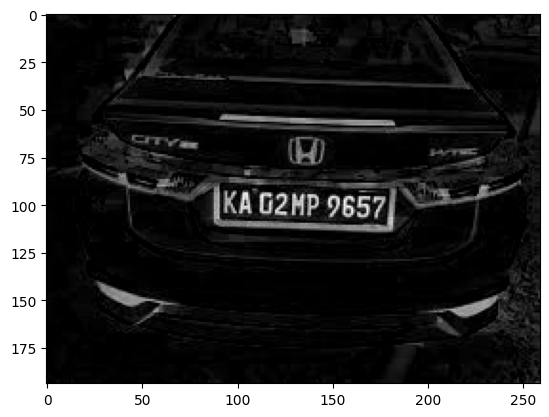

In [ ]:
car_img = cv2.imread("/content/car4.jpg")
grey = cv2.cvtColor(car_img, cv2.COLOR_BGR2GRAY)
car_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (13,5))
car_blackhat = cv2.morphologyEx(grey, cv2.MORPH_BLACKHAT, car_kern)

plt.imshow(car_blackhat, cmap='gray')

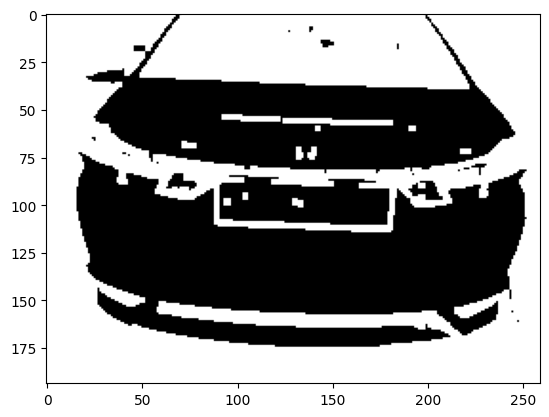

In [ ]:
sqr_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
car_light = cv2.morphologyEx(grey, cv2.MORPH_CLOSE, sqr_kern)
car_thresh = cv2.threshold(car_light.copy(), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

plt.imshow(car_thresh, cmap='gray')



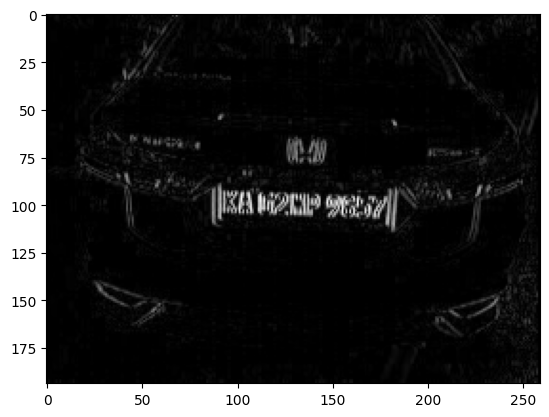

In [ ]:
gradX = cv2.Sobel(car_blackhat, ddepth=cv2.CV_32F,dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))

gradX = 255 * ((gradX - minVal) / (maxVal - minVal))

gradX = gradX.astype("uint8")
plt.imshow(gradX, cmap='gray')



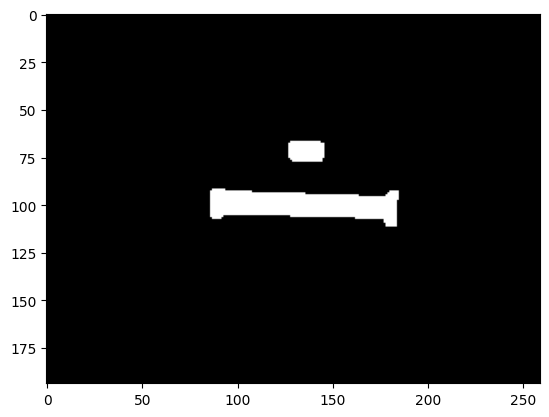

In [ ]:
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)

gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, car_kern)

car_thresh_2 = cv2.threshold(gradX, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(car_thresh_2, cmap='gray')
car_thresh_erode = cv2.erode(car_thresh_2, None, iterations=2)
car_thresh_dilate = cv2.dilate(car_thresh_erode, None, iterations=2)
plt.imshow(car_thresh_dilate, cmap='gray')

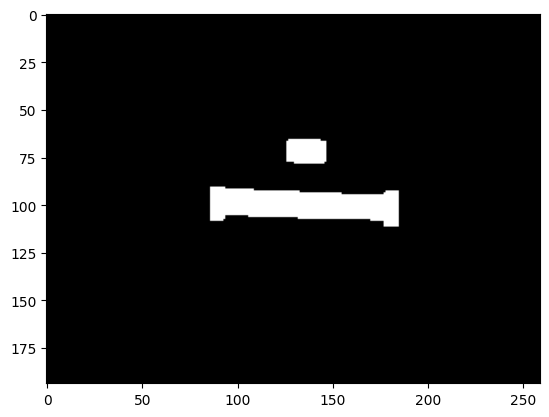

In [ ]:
thresh = cv2.bitwise_and(car_thresh_dilate, car_thresh_dilate)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=1)

plt.imshow(thresh, cmap="gray")

In [ ]:
cnts = cv2.findContours(car_thresh_dilate.copy(), cv2.RETR_EXTERNAL,
			cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

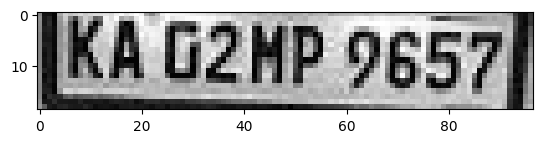

In [ ]:
from skimage.segmentation import clear_border

lpCnt = None
roi = None

for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  ar= w/float(h)


  if ar >= 4 and ar <= 6:
    lpCnt = c
    license_plate = grey[y:y+h, x:x+w]
    roi = cv2.threshold(license_plate, 0, 255,
					cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    roi = clear_border(roi)


plt.imshow(license_plate, cmap='gray')



In [ ]:
import pytesseract
predicted_result = pytesseract.image_to_string(license_plate, lang ='eng')

print(predicted_result)

KA G2MP 9657]



In [ ]:
def find_contours(dimensions, img) :

    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:25]


    x_cntr_list = []
    target_contours = []
    img_res = []

    for cntr in cntrs :
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX)

            char_copy = np.zeros((44,24))
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            char = cv2.subtract(255, char)

            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy)

    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])
    img_res = np.array(img_res_copy)

    return img_res


In [ ]:
def segment_characters(image) :

    img = cv2.resize(image, (333, 75))
    _, img_binary_lp = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255



    dimensions = [LP_WIDTH/6, LP_WIDTH/2, LP_HEIGHT/10, 2*LP_HEIGHT/3]

    plt.imshow(img_binary_lp, cmap="gray")
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list


<ipython-input-21-88d1692a4118>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 10, i+1)


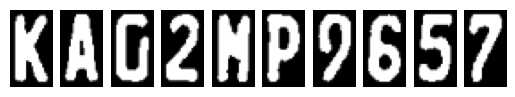

In [ ]:
char = segment_characters(license_plate)

for i in range(10):
       plt.subplot(1, 10, i+1)
       plt.imshow(char[i], cmap='gray')
       plt.axis('off')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: ignored

In [ ]:
import tensorflow.keras.backend as K
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
path = '/content/data'
train_generator = train_datagen.flow_from_directory(
        path+'/train',
        target_size=(28,28),
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',
        target_size=(28,28),
        class_mode='sparse')

FileNotFoundError: ignored

In [ ]:
model = Sequential()
model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0001))
model.summary()

In [ ]:
!pip install pyyaml h5py

In [ ]:
batch_size = 1
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator,
      epochs = 25, verbose=1)


In [ ]:
new_model = tf.keras.models.load_model('number_plate.h5')

OSError: ignored

In [ ]:
def fix_dimension(img):
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img

def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char):
        img_ = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3)
        y_ = new_model.predict(img)[0]
        y_ = np.argmax(y_)
        character = dic[y_]
        output.append(character)

    plate_number = ''.join(output)

    return plate_number

In [ ]:
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()

In [ ]:
!wget --no-check-certificate \
https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml \
-O haarcascade_frontalface_default.xml

--2022-12-17 03:48:14--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2022-12-17 03:48:15 (57.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



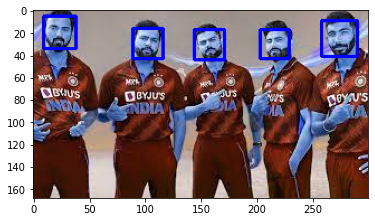

In [ ]:
# FACE DETECTION

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

ind_img = cv2.imread('/content/ind.jpg')
faces = face_cascade.detectMultiScale(ind_img, 1.1, 4)

for (x,y,w,h) in faces:
  cv2.rectangle(ind_img, (x,y), (x+w,y+h), (0,0,255), 2)

plt.imshow(ind_img)

In [ ]:
!pip install face_recognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/1/15/Virat_Kohli_portrait.jpg -O known/kohli.jpg
!wget https://admin.thecricketer.com/weblab/sites/96c8b790-b593-bfda-0ba4-ecd3a9fdefc2/resources/images/site/sharmaheadshot-min.jpg -O known/rohit.jpg
!wget https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_640,q_50/lsci/db/PICTURES/CMS/316600/316600.png -O known/jadeja.jpg
!wget https://theshillongtimes.com/wp-content/uploads/2021/10/KL-Rahul-copy-e1654713312691.jpg -O known/rahul.jpg

mkdir: cannot create directory ‘known’: File exists
--2022-12-17 03:48:27--  https://upload.wikimedia.org/wikipedia/commons/1/15/Virat_Kohli_portrait.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 650396 (635K) [image/jpeg]
Saving to: ‘known/kohli.jpg’

known/kohli.jpg     100%[===================>] 635.15K  --.-KB/s    in 0.03s   

2022-12-17 03:48:27 (21.4 MB/s) - ‘known/kohli.jpg’ saved [650396/650396]

--2022-12-17 03:48:27--  https://admin.thecricketer.com/weblab/sites/96c8b790-b593-bfda-0ba4-ecd3a9fdefc2/resources/images/site/sharmaheadshot-min.jpg
Resolving admin.thecricketer.com (admin.thecricketer.com)... 213.175.208.98
Connecting to admin.thecricketer.com (admin.thecricketer.com)|213.175.208.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59468 (58K) [i

In [ ]:
!mkdir unknown
!wget https://www.sportstime247.com/wp-content/uploads/2022/07/Virat-kohli-rested.jpg -O unknown/1.jpg
!wget https://bcciplayerimages.s3.ap-south-1.amazonaws.com/playerheadshot/bcci/1000x1280/107.png -O unknown/2.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/b/b1/Ravindra_Jadeja_in_2018.jpg -O unknown/3.jpg
!wget https://timesofindia.indiatimes.com/photo/69257009.cms -O unknown/4.jpg

mkdir: cannot create directory ‘unknown’: File exists
--2022-12-17 03:48:29--  https://www.sportstime247.com/wp-content/uploads/2022/07/Virat-kohli-rested.jpg
Resolving www.sportstime247.com (www.sportstime247.com)... 217.21.81.119, 2a02:4780:11:937:0:383a:a8d6:1
Connecting to www.sportstime247.com (www.sportstime247.com)|217.21.81.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140561 (137K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>] 137.27K   324KB/s    in 0.4s    

2022-12-17 03:48:30 (324 KB/s) - ‘unknown/1.jpg’ saved [140561/140561]

--2022-12-17 03:48:30--  https://bcciplayerimages.s3.ap-south-1.amazonaws.com/playerheadshot/bcci/1000x1280/107.png
Resolving bcciplayerimages.s3.ap-south-1.amazonaws.com (bcciplayerimages.s3.ap-south-1.amazonaws.com)... 52.219.156.78
Connecting to bcciplayerimages.s3.ap-south-1.amazonaws.com (bcciplayerimages.s3.ap-south-1.amazonaws.com)|52.219.156.78|:443... connected.
HTTP r

Rahul
Adi
Jadeja
Rohit
Kohli
Kohli


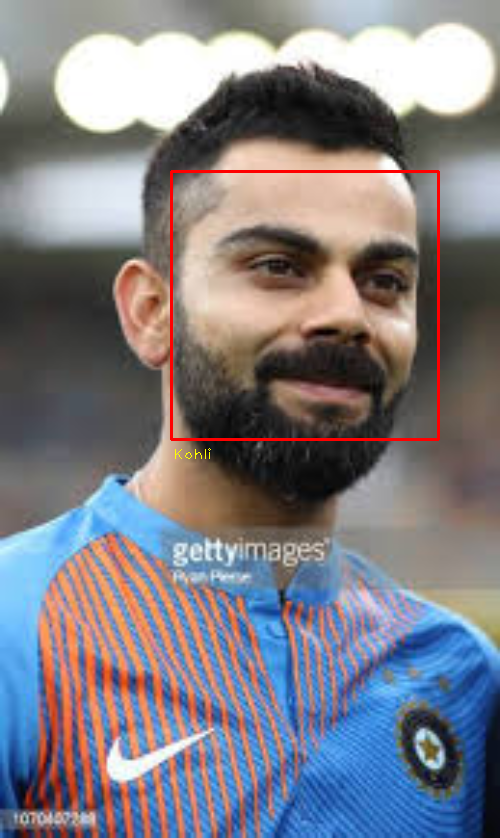

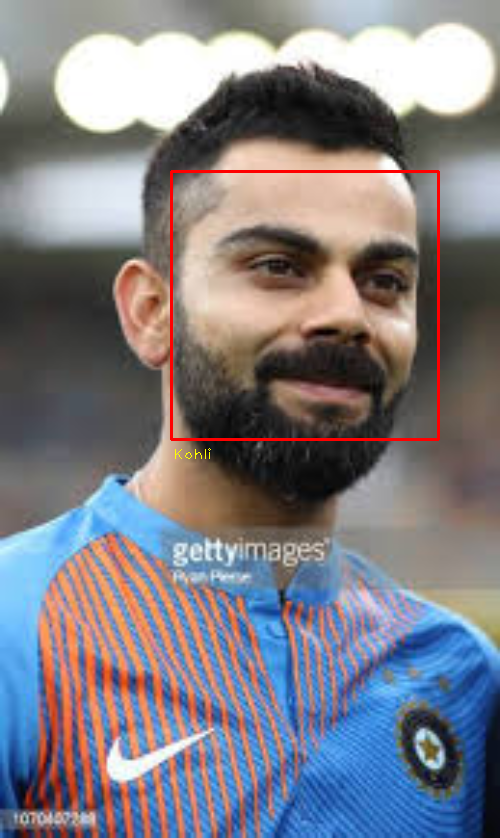

In [ ]:
import face_recognition

known_encodings = []
known_names = []

for directory_path in glob.glob('/content/known/*'):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
      img = cv2.imread(img_path)
      if img is not None:
        (h, w) = img.shape[:2]
        width = 500
        ratio = width / float(w)
        height = int(h * ratio)
        img = cv2.resize(img, (width, height))
        img_enc = face_recognition.face_encodings(img)[0]
        known_encodings.append(img_enc)
        known_names.append(label)

cric_img = cv2.imread('/content/unknown/1.jpg')
(h, w) = cric_img.shape[:2]
width = 500
ratio = width / float(w)
height = int(h * ratio)
cric_img = cv2.resize(cric_img, (width, height))
img_encoding = face_recognition.face_encodings(cric_img)[0]
results = face_recognition.compare_faces(known_encodings, img_encoding, tolerance=0.4)

res = [i for i, val in enumerate(results) if val]
cricname = known_names[res[0]]

print(cricname)


for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(cric_img)[0]
            cv2.rectangle(cric_img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(cric_img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255), 1)
            cv2_imshow(cric_img)


In [ ]:
print(known_encodings)

[array([-0.18153854,  0.09768797,  0.07440969, -0.06249354,  0.00776168,
       -0.09748887, -0.02886463, -0.09704697,  0.11587324, -0.01453317,
        0.19070594, -0.00120356, -0.21816583, -0.09141786, -0.0212478 ,
        0.04385318, -0.1230579 , -0.17188267, -0.01134931, -0.13080297,
        0.10199851,  0.05469706,  0.00752062,  0.03868916, -0.21818407,
       -0.28784519, -0.08567923, -0.15821826, -0.0126995 , -0.12406048,
        0.02330096,  0.01078823, -0.16106512, -0.0184671 , -0.01139069,
        0.11861675,  0.0958871 , -0.02607965,  0.14792238, -0.02272523,
       -0.12360507, -0.02721184,  0.06092311,  0.28192931,  0.09399931,
        0.03235535,  0.04005994, -0.00862432,  0.09437105, -0.18901527,
        0.10115921,  0.10771177,  0.05593274,  0.01073614,  0.13155006,
       -0.16069742, -0.00349672,  0.02305591, -0.17935359,  0.05821702,
        0.03243981,  0.00771586, -0.04406718, -0.0287366 ,  0.17483798,
        0.0750584 , -0.12398195, -0.10339927,  0.07899973, -0.1

In [ ]:
def js_to_image(js_reply):

  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


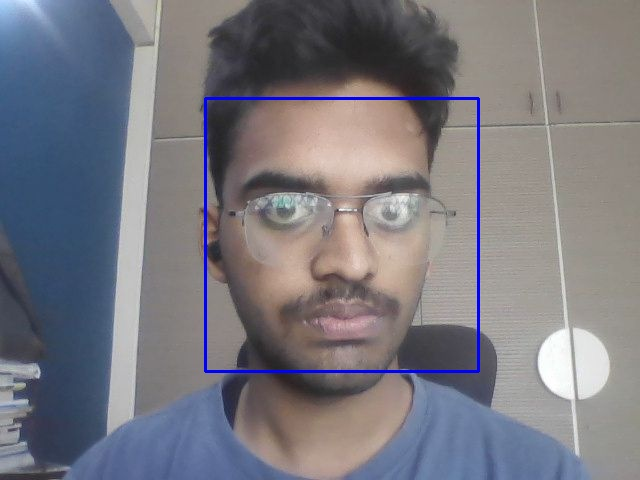

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

375 500
[-0.0993313   0.10285547  0.09151383  0.01007391 -0.01298465 -0.04109398
  0.00641774 -0.13211861  0.18163466 -0.06468517  0.1570192   0.01708176
 -0.13392889 -0.08882304 -0.03581311  0.07707772 -0.15157335 -0.16918056
 -0.07994999 -0.14812435  0.07146254  0.0082722   0.00265599  0.00283524
 -0.11345344 -0.26249576 -0.13733129 -0.19012812  0.03145992 -0.09118836
  0.02547394 -0.01082397 -0.20057373 -0.06317126 -0.05939597 -0.01464931
  0.03830632 -0.02705417  0.14779922  0.02369716 -0.10559425 -0.02394061
  0.06145374  0.23830168  0.18778278  0.09323359 -0.02001233  0.06211024
  0.02757469 -0.18790901  0.04409615  0.14894022  0.09328274  0.08979286
  0.07115442 -0.11386693 -0.00632464 -0.05764231 -0.13848618  0.07791169
  0.05584126 -0.07377134 -0.05106667  0.03402948  0.21429254  0.10991973
 -0.06006194 -0.09051082  0.12155969 -0.21988429 -0.07066517  0.01511287
 -0.13404174 -0.091424   -0.25696564  0.06670393  0.46941566  0.13427754
 -0.14082178 -0.00488174 -0.13581903 -0.014

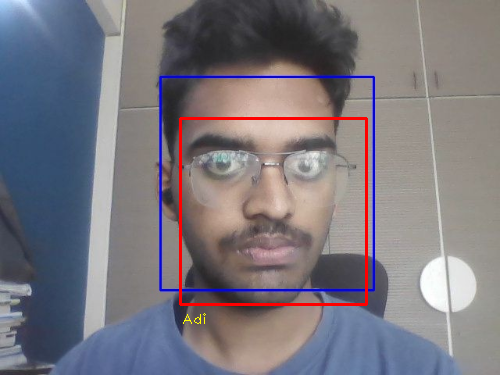

In [ ]:
import face_recognition

cric_img = cv2.imread('photo.jpg')
(h, w) = cric_img.shape[:2]
width = 500
ratio = width / float(w)
height = int(h * ratio)
print(height,width)
cric_img = cv2.resize(cric_img, (width, height))
encoding1 = face_recognition.face_encodings(cric_img)[0]


results = face_recognition.compare_faces(known_encodings, encoding1, tolerance=0.4)

res = [i for i, val in enumerate(results) if val]
cricname = known_names[res[0]]

print(cricname)

for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(cric_img)[0]
            cv2.rectangle(cric_img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(cric_img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255), 1)
            cv2_imshow(cric_img)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_labels = []
cancer_images = []
cancer_labels = ['cancer', 'no_cancer']


for directory_path in glob.glob('/content/drive/MyDrive/OralCancer/*'):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
      img = cv2.imread(img_path)
      grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img2 = cv2.resize(grey_img, (256,256))
      img3 = np.array(img2)
      cancer_images.append(img3)
      if label == 'cancer':
        img_labels.append(0)
      else:
        img_labels.append(1)

npcancer_images = np.array(cancer_images)
npcancer_labels = np.array(img_labels)




In [ ]:
print(npcancer_images.shape)

(149, 256, 256)


In [ ]:
import keras
x_train,x_test,y_train,y_test = train_test_split(npcancer_images, npcancer_labels, test_size = 0.1)

train_data = x_train.astype(np.float32)/255
test_data = x_test.astype(np.float32)/255

train_data = np.expand_dims(train_data,-1)
test_data = np.expand_dims(test_data,-1)

train_labels = keras.utils.to_categorical(y_train)
test_labels = keras.utils.to_categorical(y_test)

print(len(test_labels))


15


In [ ]:

model = Sequential()

# Layer 1
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer 3
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 30, 30, 64)     

In [ ]:
model.fit(train_data, train_labels,epochs=20, validation_split=0.25)


Epoch 1/20


ValueError: ignored

In [ ]:
results = model.evaluate(test_data, test_labels)

predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis = 1)


test_label = np.argmax(test_labels, axis = 1)

print(pred_labels)
print(test_label)
# print(confusion_matrix(test_labels,pred_labels))

1/1 [==============================] - 0s 15ms/step
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 1 0 1 0 0]


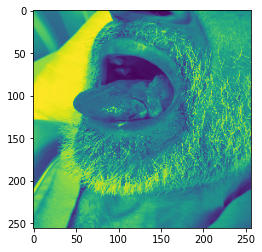

In [ ]:
canc_img = test_data[4]
plt.imshow(canc_img[:,:,0],)

In [ ]:
img_labels = []
cancer_images = []
cancer_names = ['cancer', 'no_cancer']
# cancer_label = {class_type:i for i, class_type in enumerate(cancer_names)}

# print(cancer_label)


for directory_path in glob.glob('/content/drive/MyDrive/OralCancer/*'):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
      img = cv2.imread(img_path)
      rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img2 = cv2.resize(rgb_img, (256,256))
      img3 = np.array(img2)
      cancer_images.append(img3)
      if label == 'cancer':
        img_labels.append(0)
      else:
        img_labels.append(1)

anpcancer_images = np.array(cancer_images, dtype =  'float32')
anpcancer_labels = np.array(img_labels, dtype = 'int32')




(256, 256, 3)


In [ ]:
import keras
ax_train,ax_test,ay_train,ay_test = train_test_split(anpcancer_images, anpcancer_labels, test_size = 0.04)

atrain_data = np.expand_dims(ax_train,-1)
atest_data = np.expand_dims(ax_test,-1)

atrain_labels = keras.utils.to_categorical(ay_train)
atest_labels = keras.utils.to_categorical(ay_test)

In [ ]:
model2 = Sequential()

# Layer 1
model2.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (256,256,3)))
model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model2.add(MaxPooling2D(pool_size=(2,2)))


# # Layer 2
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model2.add(MaxPooling2D(pool_size=(2,2)))

#Layer 3
model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(rate=0.25))
model2.add(Flatten())
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(units=2, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )
model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_81 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 60, 60, 128)     

In [ ]:
model2.fit(atrain_data, atrain_labels, epochs = 15, validation_split = 0.25)

Epoch 1/15
3/3 [==============================] - 2s 360ms/step - loss: 158.1471 - accuracy: 0.5417 - val_loss: 21.1775 - val_accuracy: 0.6667
Epoch 2/15
3/3 [==============================] - 0s 105ms/step - loss: 18.3629 - accuracy: 0.5972 - val_loss: 2.5359 - val_accuracy: 0.6667
Epoch 3/15
3/3 [==============================] - 0s 106ms/step - loss: 2.1511 - accuracy: 0.5972 - val_loss: 0.6155 - val_accuracy: 0.6667
Epoch 4/15
3/3 [==============================] - 0s 116ms/step - loss: 0.5209 - accuracy: 0.7083 - val_loss: 0.9333 - val_accuracy: 0.6667
Epoch 5/15
3/3 [==============================] - 0s 105ms/step - loss: 0.7198 - accuracy: 0.6667 - val_loss: 0.8587 - val_accuracy: 0.4583
Epoch 6/15
3/3 [==============================] - 0s 105ms/step - loss: 0.6993 - accuracy: 0.6944 - val_loss: 0.7323 - val_accuracy: 0.5833
Epoch 7/15
3/3 [==============================] - 0s 106ms/step - loss: 0.5586 - accuracy: 0.7361 - val_loss: 0.6752 - val_accuracy: 0.6667
Epoch 8/15
3/3 [

In [ ]:
  results2 = model2.evaluate(atest_data, atest_labels)

predictions = model2.predict(atest_data)
pred_labels = np.argmax(predictions, axis = 1)


test_label = np.argmax(atest_labels, axis = 1)

print(pred_labels)
print(test_label)
print(confusion_matrix(test_label,pred_labels))

1/1 [==============================] - 0s 20ms/step
[0 0 0 1]
[0 0 0 1]
[[3 0]
 [0 1]]


In [ ]:
test_img1 = cv2.imread("/content/test2.jpg")
test_rgb_img = cv2.cvtColor(test_img1, cv2.COLOR_BGR2RGB)
test_img1 = cv2.resize(test_rgb_img, (256,256))
np_test = np.array([test_img1], dtype = 'float32')
np_test_2 = np.expand_dims(np_test,-1)

1/1 [==============================] - 0s 18ms/step
Cancer


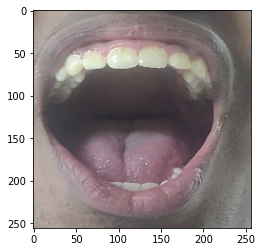

In [ ]:
predic = model2.predict(np_test)
pred_labels = np.argmax(predic, axis = 1)

plt.imshow(test_img1)

if pred_labels == 0:
      print("Cancer")
else:
      print("Non-Cancer")

In [ ]:

bax_train,bax_test,bay_train,bay_test = train_test_split(anpcancer_images, anpcancer_labels, test_size = 0.1)

batrain_data = np.expand_dims(bax_train,-1)
batest_data = np.expand_dims(bax_test,-1)

batrain_labels = keras.utils.to_categorical(bay_train)
batest_labels = keras.utils.to_categorical(bay_test)

In [ ]:
results3 = model2.evaluate(batest_data, batest_labels)

predictions2 = model2.predict(batest_data)
pred_labels2 = np.argmax(predictions2, axis = 1)


btest_label = np.argmax(batest_labels, axis = 1)

print(pred_labels2)
print(btest_label)
print(confusion_matrix(btest_label,pred_labels2))

1/1 [==============================] - 0s 22ms/step
[1 0 0 1 0 0 0 0 1 0]
[1 0 0 1 1 0 0 0 1 1]
[[5 0]
 [2 3]]
